This notebook plots the Stable and Unstable systems, as well as whether it was predicted by XGBoost to be stable or not.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

In [3]:
#This is the old data from Diana's model, i.e. not including short orbit integrations
data = pd.read_csv("ari.csv",header=0) 

In [4]:
data.head()

,Sim_ID,daOverRH1,daOverRH2,P2/P1,P3/P2,predprob,predstable,Norbits_instability,Stable
0,1648,6.879240,7.131643,1.230348,1.239099,0.264850,False,1.000000e+07,True
1,3471,8.496936,5.371167,1.286789,1.178497,0.012564,False,8.233677e+05,False
2,3849,6.822671,5.825163,1.228390,1.194028,0.005195,False,7.204145e+03,False
3,3537,5.092680,6.103170,1.169004,1.203572,0.011169,False,5.851915e+03,False
4,4214,8.928228,5.186531,1.301979,1.172200,0.076634,False,6.435885e+06,False


In [7]:
RHThresh = 16.1
XGBThresh = 0.785
Stable = data[data["Stable"]==True]
Unstable = data[data["Stable"]==False]

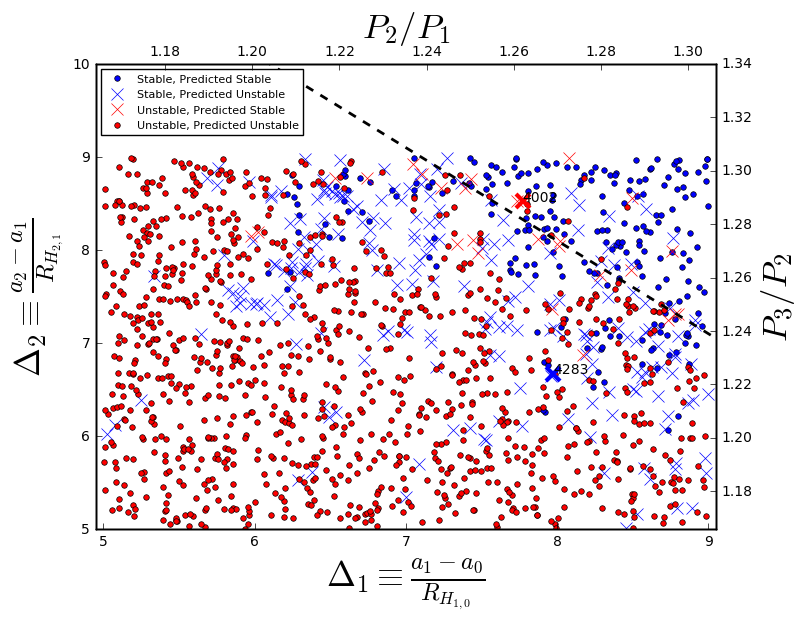

In [80]:
#highlight 4002, 4283

xaxis = "daOverRH1"
yaxis = "daOverRH2"
fontsize=25

fig, axes = plt.subplots(figsize=(8,6))
stable_pred_color="Blue"
unstable_pred_color="Red"
axes.plot(Stable[xaxis].loc[Stable["predprob"]>XGBThresh],Stable[yaxis].loc[Stable["predprob"]>XGBThresh],marker="o",markersize=4,color=stable_pred_color,linestyle="None",label="Stable, Predicted Stable")
axes.plot(Stable[xaxis].loc[Stable["predprob"]<=XGBThresh],Stable[yaxis].loc[Stable["predprob"]<=XGBThresh],marker="x",markersize=8,color=stable_pred_color,linestyle="None",label="Stable, Predicted Unstable")
axes.plot(Unstable[xaxis].loc[Unstable["predprob"]>XGBThresh],Unstable[yaxis].loc[Unstable["predprob"]>XGBThresh],marker="x",markersize=8,color=unstable_pred_color,linestyle="None",label="Unstable, Predicted Stable")
axes.plot(Unstable[xaxis].loc[Unstable["predprob"]<=XGBThresh],Unstable[yaxis].loc[Unstable["predprob"]<=XGBThresh],marker="o",markersize=4,color=unstable_pred_color,linestyle="None",label="Unstable, Predicted Unstable")
miny,maxy,minx,maxx = 5,10,4.95,9.05
axes.set_ylim([miny,maxy])
axes.set_xlim([minx,maxx])
axes.set_xlabel(r"$ \Delta_1 \equiv \frac{a_1 - a_0}{R_{H_{1,0}}}$", fontsize=fontsize)
axes.set_ylabel(r"$ \Delta_2 \equiv \frac{a_2 - a_1}{R_{H_{2,1}}}$", fontsize=fontsize) 
leg = axes.legend(loc="upper left",numpoints=1,fontsize=8,scatterpoints=1)

#Lissauer et al. (2011)
x = np.arange(5,9.5,0.1)
axes.plot(x,RHThresh-x, 'k--', lw=2, label='$\Delta_1 + \Delta_2$=%.1f'%RHThresh)

#add labels for sim_id=4002 and 4283
sim_ids = [4002,4283]
plot_colors = ['red','blue']
xy = zip(data)
for i,ids in enumerate(sim_ids):
    xy = [data.loc[data["Sim_ID"]==ids,xaxis],data.loc[data["Sim_ID"]==ids,yaxis]]
    plt.plot(xy[0],xy[1],marker='x',color=plot_colors[i],mew=3, ms=10, label='')
    plt.annotate('%d' % ids, xy=xy, textcoords='data')

#second axes
axes2 = axes.twinx()
mn, mx = axes2.get_ylim()
lowx,highx,lowy,highy = (0.021544*minx+1)**1.5, (0.021544*maxx+1)**1.5, (0.021544*miny+1)**1.5, (0.021544*maxy+1)**1.5
axes2.set_ylim(lowy,highy)
axes2.set_ylabel('$P_3/P_2$', fontsize=fontsize)

axes3 = axes.twiny()
mn, mx = axes2.get_xlim()
axes3.set_xlim(lowx,highx)
axes3.set_xlabel('$P_2/P_1$', fontsize=fontsize)

axes.plot()
plt.savefig("DianaModel_predictions.pdf")

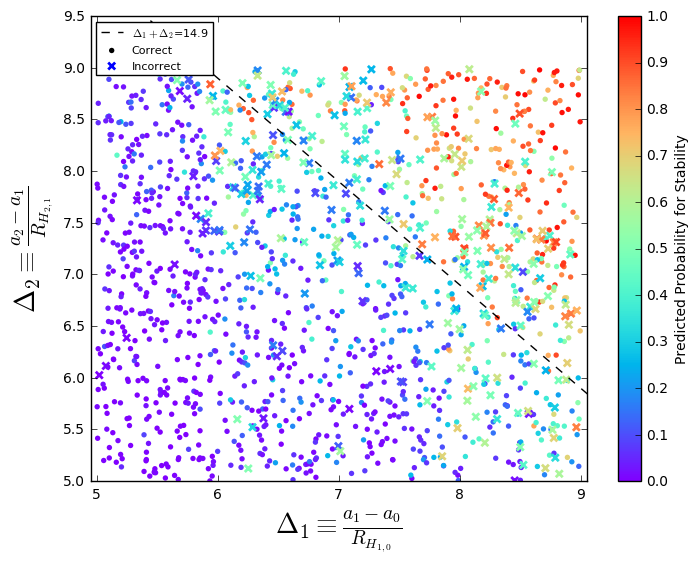

In [20]:
fig, axes = plt.subplots(figsize=(8,6))

correct_stable = Stable[Stable["predprob"]>XGBThresh]
incorrect_stable = Stable[Stable["predprob"]<=XGBThresh]
correct_unstable = Unstable[Unstable["predprob"]<=XGBThresh]
incorrect_unstable = Unstable[Unstable["predprob"]>XGBThresh]

im = axes.scatter(correct_stable["daOverRH1"],correct_stable["daOverRH2"],marker="o",s=15,lw=0,c=correct_stable["predprob"],cmap=cm.rainbow,vmin=0,vmax=1,label="Correct")
axes.scatter(correct_unstable["daOverRH1"],correct_unstable["daOverRH2"],marker="o",s=15,lw=0,c=correct_unstable["predprob"],cmap=cm.rainbow,vmin=0,vmax=1,label='')
axes.scatter(incorrect_stable["daOverRH1"],incorrect_stable["daOverRH2"],marker="x",s=25,lw=2,c=incorrect_stable["predprob"],cmap=cm.rainbow,vmin=0,vmax=1,label="Incorrect")
axes.scatter(incorrect_unstable["daOverRH1"],incorrect_unstable["daOverRH2"],marker="x",s=25,lw=2,c=incorrect_unstable["predprob"],cmap=cm.rainbow,vmin=0,vmax=1,label='')
plt.colorbar(im, label='Predicted Probability for Stability')
axes.set_ylim([5,9.5])
axes.set_xlim([4.95,9.05])
axes.set_xlabel(r"$ \Delta_1 \equiv \frac{a_1 - a_0}{R_{H_{1,0}}}$", fontsize=20)
axes.set_ylabel(r"$ \Delta_2 \equiv \frac{a_2 - a_1}{R_{H_{2,1}}}$", fontsize=20)

#Lissauer et al. (2011)
x = np.arange(5,9.5,0.1)
axes.plot(x,14.9-x, 'k--',label='$\Delta_1 + \Delta_2$=%.1f'%RHThresh)

leg = axes.legend(loc="upper left",numpoints=1,fontsize=8,scatterpoints=1)
leg.legendHandles[0].set_color('black')
leg.legendHandles[1].set_color('black')

plt.savefig("../data/ari_correct.pdf")

In [ ]:
#log-normal Norbit_instability plots, overplot gaussian fits as well. 